In [1]:
import tensorflow_hub as hub

import pandas as pd

import tensorflow_text as text

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf

import numpy as np

In [2]:
# load data
df = pd.read_csv(r'C:\Users\mkahs\Repository\SPAM-BERT\SPAM text message 20170820 - Data.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# check count and unique and top values and their frequency
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [4]:
# check percentage of data - states how much data needs to be balanced
print(str(round(747/4825,2))+'%')

0.15%


In [5]:
# creating 2 new dataframe as df_ham , df_spam

df_spam = df[df['Category']=='spam']

df_ham = df[df['Category']=='ham']

print("Ham Dataset Shape:", df_ham.shape)

print("Spam Dataset Shape:", df_spam.shape)

Ham Dataset Shape: (4825, 2)
Spam Dataset Shape: (747, 2)


In [6]:
# downsampling ham dataset - take only random 747 example
# will use df_spam.shape[0] - 747
df_ham_downsampled = df_ham.sample(df_spam.shape[0])
df_ham_downsampled.shape

(747, 2)

In [7]:
# concating both dataset - df_spam and df_ham_balanced to create df_balanced dataset
df_balanced = pd.concat([df_spam , df_ham_downsampled])

In [8]:
df_balanced['Category'].value_counts()

spam    747
ham     747
Name: Category, dtype: int64

In [9]:
df_balanced.sample(10)

,Category,Message
2169,ham,Thx. All will be well in a few months
3244,ham,Pls accept me for one day. Or am begging you c...
4202,ham,Wylie update: my weed dealer carlos went to fr...
2041,ham,You always make things bigger than they are
2581,spam,U are subscribed to the best Mobile Content Se...
856,spam,Talk sexy!! Make new friends or fall in love i...
1321,ham,Just sent again. Do you scream and moan in bed...
4896,spam,Want the latest Video handset? 750 anytime any...
2634,ham,That's what I love to hear :V see you sundayis...
1708,ham,Was doing my test earlier. I appreciate you. W...


In [10]:
# creating numerical repersentation of category - one hot encoding
df_balanced['spam'] = df_balanced['Category'].apply(lambda x:1 if x=='spam' else 0)

In [11]:
# displaying data - spam -1 , ham-0
df_balanced.sample(4)

,Category,Message,spam
4243,spam,Show ur colours! Euro 2004 2-4-1 Offer! Get an...,1
3556,spam,From next month get upto 50% More Calls 4 Ur s...,1
1321,ham,Just sent again. Do you scream and moan in bed...,0
2990,spam,No 1 POLYPHONIC tone 4 ur mob every week! Just...,1


In [12]:
# loading train test split
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(df_balanced['Message'], df_balanced['spam'],
                                                    stratify = df_balanced['spam'])

In [15]:
# downloading preprocessing files and model
# Load BERT and the preprocessing model from TF Hub.
# bert_preprocessor = hub.load('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1')
# bert_encoder = hub.load('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3')
bert_preprocessor = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')

In [16]:
text_input = tf.keras.layers.Input(shape = (), dtype = tf.string, name = 'Inputs')
preprocessed_text = bert_preprocessor(text_input)
embeed = bert_encoder(preprocessed_text)
dropout = tf.keras.layers.Dropout(0.1, name = 'Dropout')(embeed['pooled_output'])
outputs = tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'Dense')(dropout)

In [17]:
# creating final model
model = tf.keras.Model(inputs = [text_input], outputs = [outputs])

In [18]:
# check the summary of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Inputs (InputLayer)            [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['Inputs[0][0]']                 
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

In [19]:
Metrics = [tf.keras.metrics.BinaryAccuracy(name = 'accuracy'),
           tf.keras.metrics.Precision(name = 'precision'),
           tf.keras.metrics.Recall(name = 'recall')
           ]

In [20]:
# compiling our model
model.compile(optimizer ='adam',
               loss = 'binary_crossentropy',
               metrics = Metrics)

In [21]:
history = model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
35/35 [==============================] - 20s 335ms/step - loss: 0.6633 - accuracy: 0.5929 - precision: 0.6004 - recall: 0.5554
Epoch 2/10
35/35 [==============================] - 12s 335ms/step - loss: 0.5394 - accuracy: 0.7759 - precision: 0.7668 - recall: 0.7929
Epoch 3/10
35/35 [==============================] - 12s 337ms/step - loss: 0.4568 - accuracy: 0.8580 - precision: 0.8416 - recall: 0.8821
Epoch 4/10
35/35 [==============================] - 12s 342ms/step - loss: 0.4069 - accuracy: 0.8723 - precision: 0.8564 - recall: 0.8946
Epoch 5/10
35/35 [==============================] - 11s 328ms/step - loss: 0.3738 - accuracy: 0.8839 - precision: 0.8785 - recall: 0.8911
Epoch 6/10
35/35 [==============================] - 12s 331ms/step - loss: 0.3419 - accuracy: 0.8893 - precision: 0.8798 - recall: 0.9018
Epoch 7/10
35/35 [==============================] - 12s 329ms/step - loss: 0.3280 - accuracy: 0.8938 - precision: 0.8808 - recall: 0.9107
Epoch 8/10
35/35 [================

In [22]:
# Evaluating performance
model.evaluate(X_test,y_test)

12/12 [==============================] - 5s 328ms/step - loss: 0.2647 - accuracy: 0.9171 - precision: 0.8900 - recall: 0.9519


[0.2646516263484955,
 0.9171122908592224,
 0.8899999856948853,
 0.9518716335296631]

In [27]:
# getting y_pred by predicting over X_text and flattening it
import numpy as np
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)
y_pred = y_pred.flatten() # require to be in one-dimensional array , for easy manipulation

In [29]:
# y_pred

In [30]:
# y_test

In [31]:
# importing confusion maxtrix

from sklearn.metrics import confusion_matrix , classification_report

# creating confusion matrix 

cm = confusion_matrix(y_test,y_pred)

In [32]:
cm

array([[165,  22],
       [  9, 178]], dtype=int64)

In [33]:
# plotting as a graph - importing seaborn
import seaborn as sns

Text(33.0, 0.5, 'Actual')

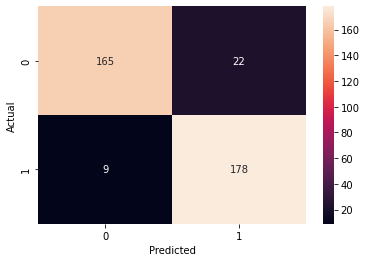

In [34]:
# creating a graph out of confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [35]:
# printing classification report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       187
           1       0.89      0.95      0.92       187

    accuracy                           0.92       374
   macro avg       0.92      0.92      0.92       374
weighted avg       0.92      0.92      0.92       374



In [36]:
predict_text = [
                # Spam
                'We’d all like to get a $10,000 deposit on our bank accounts out of the blue, but winning a prize—especially if you’ve never entered a contest', 
                'Netflix is sending you a refund of $12.99. Please reply with your bank account and routing number to verify and get your refund', 
                'Your account is temporarily frozen. Please log in to to secure your account ', 
                #ham
                'The article was published on 18th August itself',
                'Although we are unable to give you an exact time-frame at the moment, I would request you to stay tuned for any updates.',
                'The image you sent is a UI bug, I can check that your article is marked as regular and is not in the monetization program.'
]

In [37]:
test_results = model.predict(predict_text)

In [38]:
output = np.where(test_results>0.5,'spam', 'ham')

In [39]:
output

array([['spam'],
       ['spam'],
       ['spam'],
       ['ham'],
       ['spam'],
       ['spam']], dtype='<U4')